In [20]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [21]:
workspace = Path()
model_id = "20240522_0945_b16-e500-w411-aug-xyz-d03-lr1e-4-wd00001_fold0"
tasks = ["segmentation", "noduletype", "malignancy"]

{'train': [{'loss_segmentation': 0.9716471903251879, 'loss_noduletype': 1.3675938808556758, 'loss_malignancy': 0.7032110691070557, 'loss_total': 3.0424521547375303, 'malignancy_auc': 0.4945799059929495, 'noduletype_balanced_accuracy': 0.2633786912652542, 'noduletype_accuracy': 0.3365019011406844, 'segmentation_dice': 0.02835280967481213}, {'loss_segmentation': 0.9572877649104956, 'loss_noduletype': 1.3437564878752737, 'loss_malignancy': 0.7074345765691815, 'loss_total': 3.0084788221301455, 'malignancy_auc': 0.5007779668164435, 'noduletype_balanced_accuracy': 0.25, 'noduletype_accuracy': 0.38783269961977185, 'segmentation_dice': 0.04271223508950439}, {'loss_segmentation': 0.9556018872694536, 'loss_noduletype': 1.3419681534622654, 'loss_malignancy': 0.6920122269428137, 'loss_total': 2.989582242387714, 'malignancy_auc': 0.5623177049323059, 'noduletype_balanced_accuracy': 0.25, 'noduletype_accuracy': 0.38022813688212925, 'segmentation_dice': 0.04439811273054639}, {'loss_segmentation': 0.95

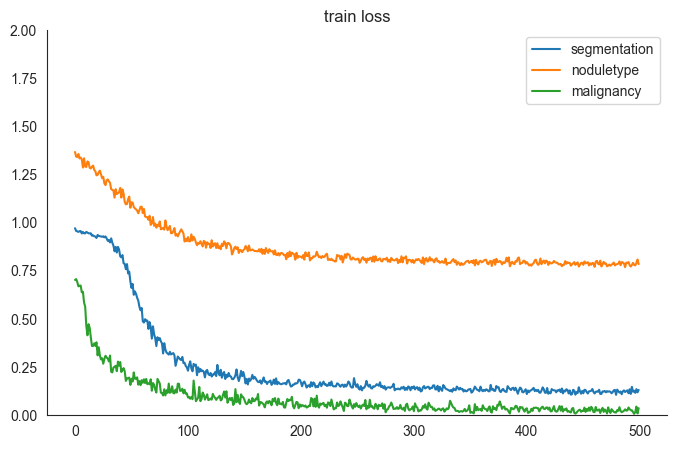

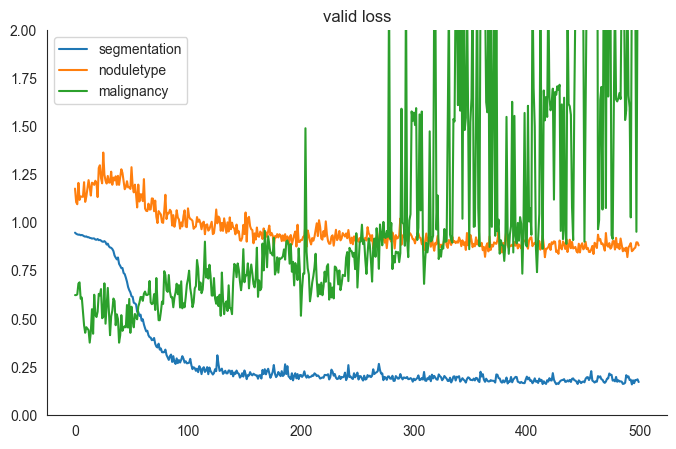

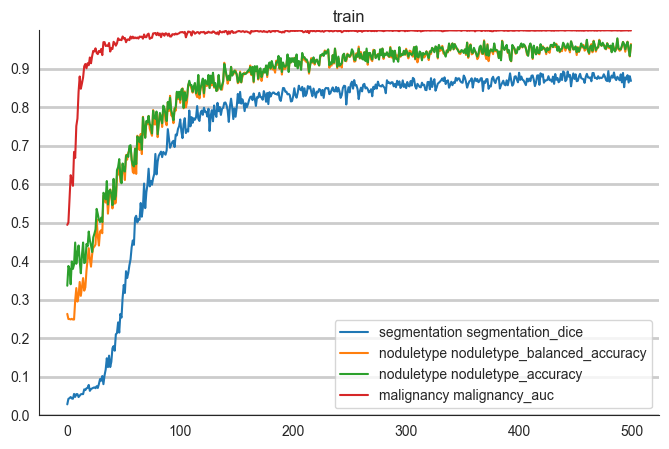

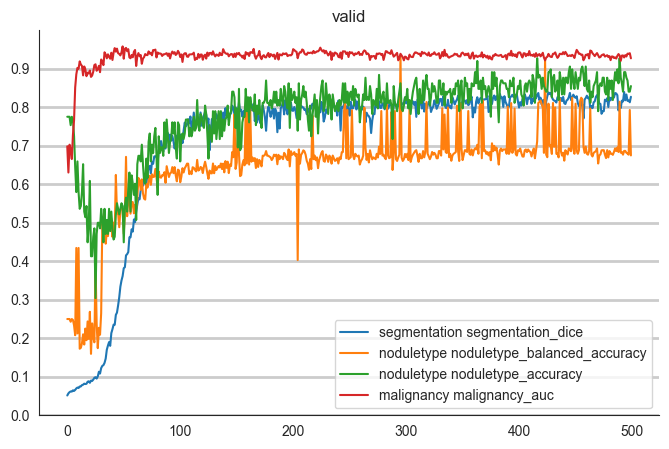

In [22]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

print(metrics)
figsize=(8,5)
for mode in ["train", "valid"]:
    plt.figure(figsize=figsize)
    for task in tasks:
        plt.plot(
            [metrics[mode][i][f"loss_{task}"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 2])
    sns.despine()

task_specific_metrics = {
    "segmentation": ["segmentation_dice"],
    "malignancy": ["malignancy_auc"],
    "noduletype": ["noduletype_balanced_accuracy", "noduletype_accuracy"],
}

for mode in ["train", "valid"]:
    plt.figure(figsize=figsize)
    for task in tasks:
        for metric in task_specific_metrics[task]:
            plt.plot(
                [metrics[mode][i][metric] for i in range(len(metrics[mode]))],
                label=f"{task} {metric}",
            )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    plt.yticks(np.arange(0,1, 0.5), minor=True)
    plt.yticks(np.arange(0,1, 0.1), minor=False)
    plt.grid(which="major", axis="y", linewidth=2)
    plt.grid(which="minor", axis="y", linewidth=1)
    sns.despine()